# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 1</span>


In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

In [2]:
# Read data from file
average = np.loadtxt("average.out")
variance = np.loadtxt("variance.out")
chi2 = np.loadtxt("chi2.out")

# Extract values for x, y, and errors for each set
npoints1 = average[:, 0]
estimation1 = average[:, 1]
errors1 = average[:, 2]

npoints2 = variance[:, 0]
estimation2 = variance[:, 1]
errors2 = variance[:, 2]

npoints3 = chi2[:, 0]
estimation3 = chi2[:, 1]

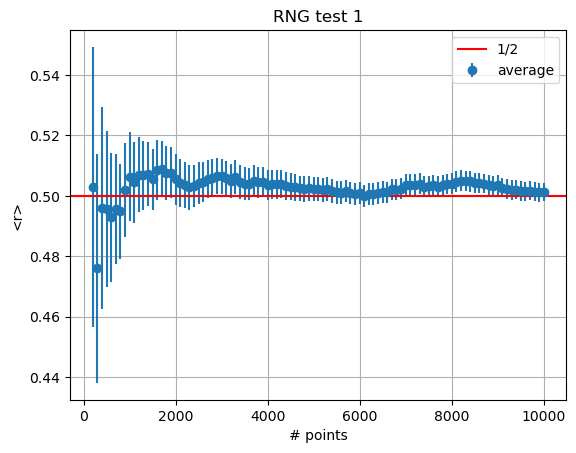

In [3]:
plt.figure(1)
plt.errorbar(npoints1, estimation1, yerr=errors1, fmt='o', label='average')
plt.axhline( y=1/2, color='r', label= '1/2')
plt.xlabel('# points')
plt.ylabel('<r>')
plt.title('RNG test 1')
plt.grid(True)
plt.legend()

plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.


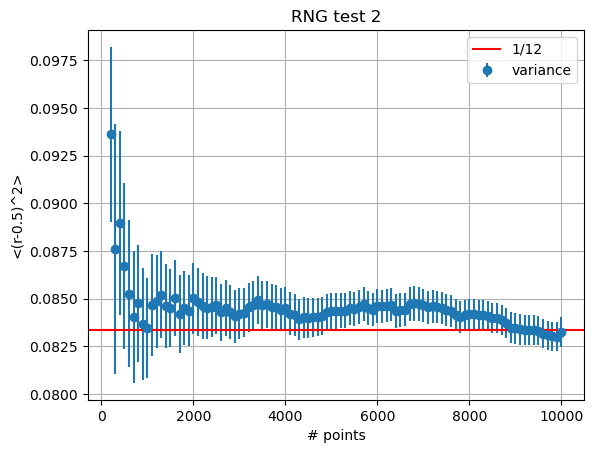

In [4]:
plt.figure(2)
plt.errorbar(npoints2, estimation2, yerr=errors2, fmt='o', label='variance')
plt.axhline( y=1/12, color='r', label= '1/12')
plt.xlabel('# points')
plt.ylabel('<(r-0.5)^2>')
plt.title('RNG test 2')
plt.grid(True)
plt.legend()

plt.show()

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution. The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$.
</p>
In the unlikely case of data perfectly matching the expected values, $\chi^2 = 0$; otherwise, $\chi^2 > 0$ grows higher as data deviate from the expected values. We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.

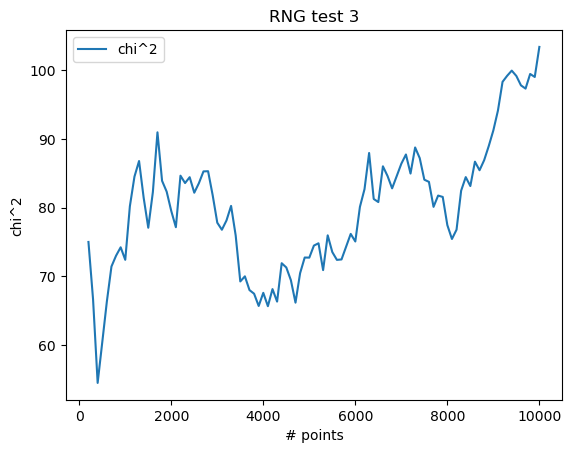

In [5]:
plt.figure(3)
plt.plot(npoints3, estimation3, label='chi^2')
plt.xlabel('# points')
plt.ylabel('chi^2')
plt.title('RNG test 3')
plt.legend()


plt.show()

### Conclusions
Both the average and the variance are within one standard deviation from the expected values for a uniform distribution. The $\chi^2$ as a function of the number of blocks we are considering is consistently below 100.
Therefore, our hypothesis (i. e. the numbers being drawn from a uniform distribution) cannot be rejected. Note that this hypothesis can't be confirmed either with statistical means. Moreover, the hypothesis is in fact false, since pseudo-random numbers are generated in a deterministic way.

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note that you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

In [6]:
from scipy.optimize import curve_fit

uniform = np.loadtxt('uniform.out')
exponential = np.loadtxt('exponential.out')
lorentzian = np.loadtxt('lorentzian.out')

unif1 = uniform[:, 0]
unif2 = uniform[:, 1]
unif10 = uniform[:, 2]
unif100 = uniform[:, 3]

exp1 = exponential[:, 0]
exp2 = exponential[:, 1]
exp10 = exponential[:, 2]
exp100 = exponential[:, 3]

lor1 = lorentzian[:, 0]
lor2 = lorentzian[:, 1]
lor10 = lorentzian[:, 2]
lor100 = lorentzian[:, 3]


def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def lorentzian(x, x0, gamma, A):
    return A * (gamma**2 / ((x - x0)**2 + gamma**2))

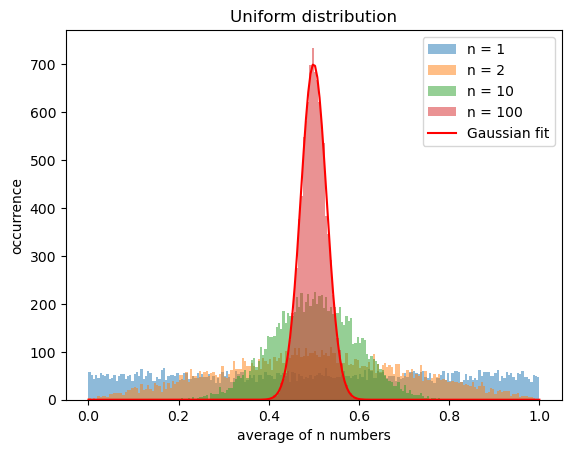

In [7]:
plt.figure(1)

bin_edges1 = np.linspace(0, 1, 201)

plt.hist(unif1, bins=bin_edges1, alpha=0.5, label='n = 1')
plt.hist(unif2, bins=bin_edges1, alpha=0.5, label='n = 2')
plt.hist(unif10, bins=bin_edges1, alpha=0.5, label='n = 10')
plt.hist(unif100, bins=bin_edges1, alpha=0.5, label='n = 100')


x1 = np.linspace(0, 1, 200)
y1, bins1 = np.histogram(unif100, bins=bin_edges1)

params1, covariance1 = curve_fit(gaussian, x1, y1, p0=[1., 1., 2.])
plt.plot(x1, gaussian(x1, *params1), color='red', label='Gaussian fit')

plt.xlabel('average of n numbers')
plt.ylabel('occurrence')
plt.title('Uniform distribution')
plt.legend()

plt.show()

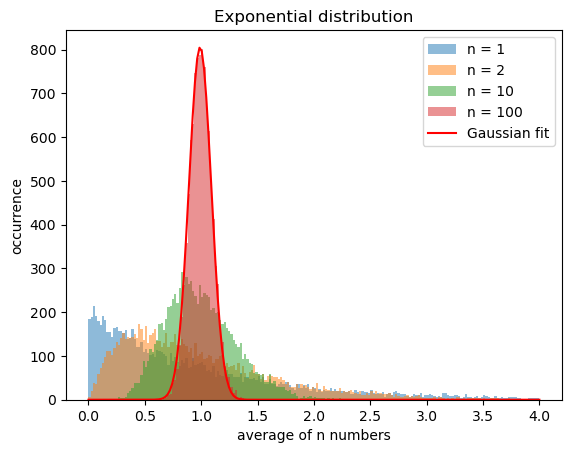

In [8]:
plt.figure(2)

bin_edges2 = np.linspace(0, 4, 201)

plt.hist(exp1, bins=bin_edges2, alpha=0.5, label='n = 1')
plt.hist(exp2, bins=bin_edges2, alpha=0.5, label='n = 2')
plt.hist(exp10, bins=bin_edges2, alpha=0.5, label='n = 10')
plt.hist(exp100, bins=bin_edges2, alpha=0.5, label='n = 100')

x2 = np.linspace(0, 4, 200)
y2, bins2 = np.histogram(exp100, bins=bin_edges2)
params2, covariance2 = curve_fit(gaussian, x2, y2, p0=[0, 1, 1], maxfev=10000)
plt.plot(x2, gaussian(x2, *params2), color='red', label='Gaussian fit')

plt.xlabel('average of n numbers')
plt.ylabel('occurrence')
plt.title('Exponential distribution')
plt.legend()

plt.show()

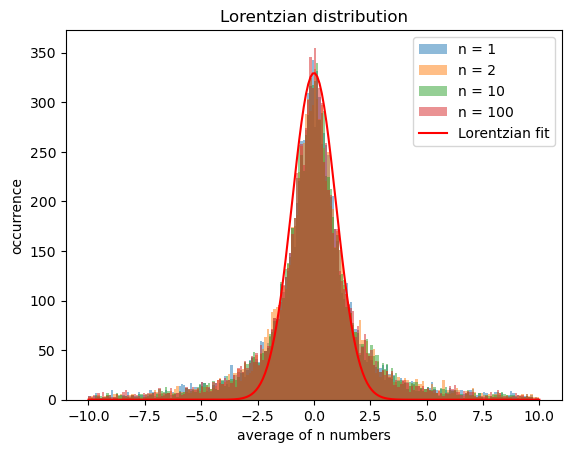

In [9]:
plt.figure(3)

plt.hist(lor1, bins=200, range=[-10, 10], alpha=0.5, label='n = 1')
plt.hist(lor2, bins=200, range=[-10, 10], alpha=0.5, label='n = 2')
plt.hist(lor10, bins=200, range=[-10, 10], alpha=0.5, label='n = 10')
plt.hist(lor100, bins=200, range=[-10, 10], alpha=0.5, label='n = 100')

x3 = np.linspace(-10, 10, 200)
y3, bins3 = np.histogram(lor100, bins=200, range=[-10, 10])
params3, covariance3 = curve_fit(lorentzian, x3, y3, p0=[1.0, 10.0, 2.0], maxfev=10000)
plt.plot(x3, gaussian(x3, *params3), color='red', label='Lorentzian fit')

plt.xlabel('average of n numbers')
plt.ylabel('occurrence')
plt.title('Lorentzian distribution')
plt.legend()

plt.show()

### Conclusions
As shown in the plots above, both the uniform and the exponential distribution converge to a normal distribution as we plot the average of an increasing amount of numbers. In constrast, the lorentzian distribution doesn't converge to a normal distribution, since the central limit theorem doesn't apply (the lorentzian has infinite variance). The Lorentzian (or Cauchy) distribution itself is in fact an attractor in the functional space of probability distribution functions.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font>. If possible, do not use $\pi$ to evaluate $\pi$.

In [10]:
buffon_data = np.loadtxt("Buffon.out")

pi_nblocks = buffon_data[:, 0]
pi_mean = buffon_data[:, 1]
pi_stddev = buffon_data[:, 2]

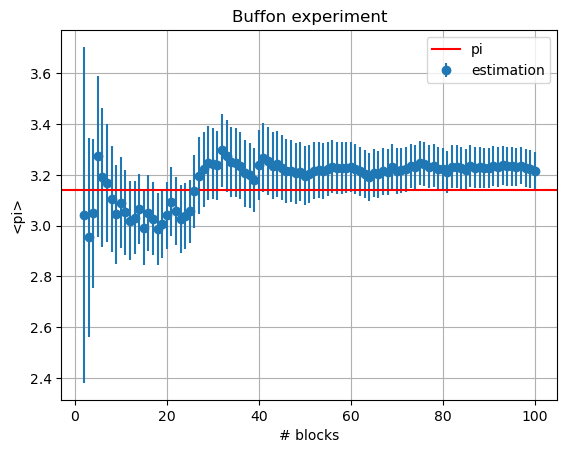

In [11]:
plt.figure(1)
plt.errorbar(pi_nblocks, pi_mean, yerr=pi_stddev, fmt='o', label='estimation')
plt.axhline( y=3.14159265, color='r', label= 'pi')
plt.xlabel('# blocks')
plt.ylabel('<pi>')
plt.title('Buffon experiment')
plt.grid(True)
plt.legend()

plt.show()

### Details of the simulation
- stick length $l = 1$
- line spacing $d = 3$ </p>
First of all (assuming that one of the horizontal lines lies on the x axis), the y coordinate of the lowermost end of the stick ($h$) is drawn from a uniform distribution in $[0, d]$. This comes without loss of generality, since the problem has a discrete translational invariance along the y axis. Next, we want to sample the angle $\theta$ of the stick with respect to the y axis (requiring $\theta\in [0, \pi]$, or, more conveniently, $\theta\in [0, \pi/2]$, since the problem is simmetric upon reflections with respect to a vertical axis). This suffices to fully desribe the position of the stick, which carries only two degrees of freedom. In order not use $\pi$ in the code (the estimation of which is the purpose of the simulation!) it is convenient to sample directly $\cos\theta$ instead: this is done by picking the y coordinate of points uniformly distributed in the square $[0, 1]\times[0, 1]$, after discarding the ones lying out of the unit circle, i.e. the points such that $x^2 + y^2 > 1$. This additional requirement ensures that the angle is sampled uniformly. It is straightforward to understand that the stick intersects the first horinzontal line if $h + l \cos\theta > d$. </p>

The result of the simulation $3.215 \pm  0.073$ is compatible with $\pi = 3.1415$.


